In [1]:
# python 2 plot legend tests

# import packages for data manipulation
from sqlalchemy import create_engine
import pandas as pd
import geopandas as gpd

# packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for interactivity
from ipywidgets import *
%matplotlib notebook

# set Seaborn context/style
sns.set_context(context='notebook')
sns.set_style('darkgrid')

# database connection
DB = 'datadb'
USER = 'postgres'
HOST = 'localhost'
PORT = '5432'
PW = 'postgres'

DB_CONNECTION_STRING = 'postgresql://{username}:{password}@{host}:{port}/{database}'.format(
username=USER, password=PW, host=HOST, port=PORT, database=DB)

engine = create_engine(DB_CONNECTION_STRING)

In [28]:
# get counties for map

qry = """
SELECT geoid, name,
    ST_Transform(geom, 4326) geom 
FROM tl_2016_us_county 
WHERE cbsafp = '{CBSA}' AND statefp = '29'
""".format(CBSA='28140')

counties = gpd.read_postgis(qry, engine, geom_col='geom')
counties['coords'] = counties.geometry.apply(lambda x: x.representative_point().coords[0])

In [29]:
counties['rand_float'] = counties.apply(lambda x: pd.np.random.random(), axis=1)

In [4]:
# create number of tick marks in legend and set location to display them
numpoints = 5
leg_ticks = pd.np.linspace(-1,1,numpoints)

# create labels based on number of tickmarks
leg_min = counties['rand_float'].min()
leg_max = counties['rand_float'].max()
leg_tick_labels = [str(round(x*100,1))+'%' for x in pd.np.linspace(leg_min,leg_max,numpoints)]

leg_kwds_dict = {'numpoints': numpoints, 'labels': leg_tick_labels}

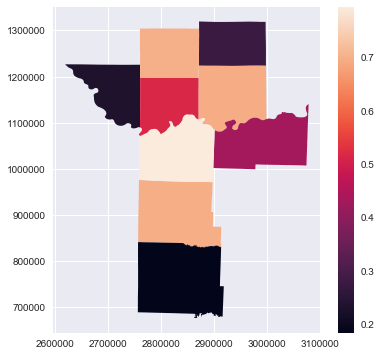

In [6]:
f, ax = plt.subplots(1, figsize=(6,6))
# ax = 
counties.plot('rand_float', legend=True, ax=ax)#, legend_kwds=leg_kwds_dict) # how do you pass 'legend_kwds'?
# ax.legend()
# handles, labels = ax.get_legend_handles_labels() # does not seem to return either handles or labels

leg = ax.get_legend()

In [7]:
type(leg)

NoneType

In [14]:
# counties.to_file('kcmo_counties.geojson', driver='GeoJSON')

In [16]:
type(counties.geom)

geopandas.geoseries.GeoSeries

In [17]:
type(counties.geom.values[0])

shapely.geometry.multipolygon.MultiPolygon

In [18]:
type(counties.geometry)

geopandas.geoseries.GeoSeries

In [19]:
type(counties.geometry.values[0])

shapely.geometry.multipolygon.MultiPolygon

In [15]:
import shapely.geometry

In [30]:
gdf = gpd.GeoDataFrame({'val':counties['rand_float']}, 
                       geometry=counties.geometry)
gdf.to_file("kcmo_counties.geojson", driver='GeoJSON')
# gdf.to_file("test.geojson", driver='GeoJSON')

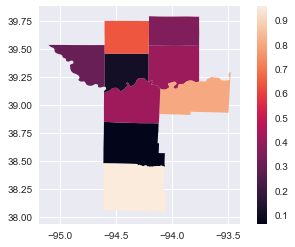

In [31]:
ax = gdf.plot('val', legend=True)
leg = ax.get_legend()
plt.show()

In [27]:
type(leg)

NoneType